In [82]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from kjm2601 import obsidian_media_path as path

In [83]:
x = sp.symbols('x')
y0, y1 = sp.symbols('y0 y1')
a = sp.symbols('a')

# Define the basis functions
x_max = a/sp.Rational(3)**sp.Rational(1, 2)
phi10 = x*(a-x)*(a+x)
phi1 = sp.simplify(phi10/phi10.subs(x, x_max))
phi2 = sp.simplify((a-x)*x*(2*a-x)/phi10.subs(x, x_max))

display(phi1)
display(phi2)

print(x_max)
# Generate overlap matrix
S11 = sp.integrate(phi1**2, (x, 0, a))
S22 = sp.integrate(phi2**2, (x, 0, a))
S12 = sp.integrate(phi1*phi2, (x, 0, a))
print(S11)
print(S22)
print(S12)

# Generate kinetic energy matrix
K11 = sp.integrate(sp.diff(phi1, x)*sp.diff(phi1, x), (x, 0, a))/2
K22 = sp.integrate(sp.diff(phi2, x)*sp.diff(phi2, x), (x, 0, a))/2
K12 = sp.integrate(sp.diff(phi1, x)*sp.diff(phi2, x), (x, 0, a))/2
print(K11)
print(K22)
print(K12)


# Generate numerical matrices
a0 = np.pi
S = np.array([[float(S11.subs(a, a0)), float(S12.subs(a, a0))], [float(S12.subs(a, a0)), float(S22.subs(a, a0))]])
K = np.array([[float(K11.subs(a, a0)), float(K12.subs(a, a0))], [float(K12.subs(a, a0)), float(K22.subs(a, a0))]])
             

3*sqrt(3)*x*(a**2 - x**2)/(2*a**3)

3*sqrt(3)*x*(2*a**2 - 3*a*x + x**2)/(2*a**3)

sqrt(3)*a/3
18*a/35
18*a/35
279*a/560
27/(10*a)
27/(10*a)
189/(80*a)


In [84]:
print(S)
print(K)

[[1.61567622 1.56518634]
 [1.56518634 1.61567622]]
[[0.85943669 0.75200711]
 [0.75200711 0.85943669]]


In [85]:
from scipy.linalg import eigh
E, C = eigh(K, S)
print(E)
print(C)

[0.50660592 2.12774486]
[[-0.39647203 -3.14689915]
 [-0.39647203  3.14689915]]


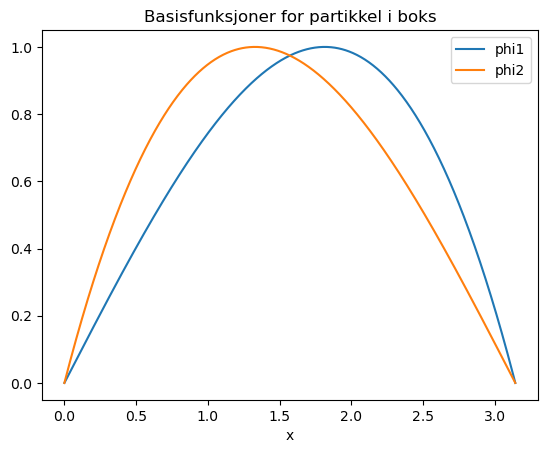

In [86]:
phi1_lamb = sp.lambdify(x, phi1.subs(a, a0))
phi2_lamb = sp.lambdify(x, phi2.subs(a, a0))

x = np.linspace(0, a0, 1000)
plt.figure()
plt.plot(x, phi1_lamb(x), label='phi1')
plt.plot(x, phi2_lamb(x), label='phi2')
psi = lambda y: y[0]*phi1_lamb(x) + y[1]*phi2_lamb(x)
#plt.plot(x, psi(C[:, 0]), label='psi')
plt.legend()
plt.title('Basisfunksjoner for partikkel i boks')
plt.xlabel('x')
plt.savefig(path + 'variasjon_basisfunksjoner.pdf')
plt.show()


In [46]:
phi1_lamb(0.3)

2.9338813203268015

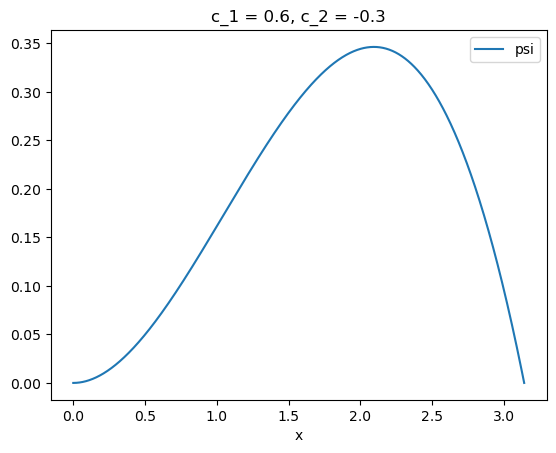

In [96]:
plt.figure()
#plt.plot(x, phi1_lamb(x), label='phi1')
#plt.plot(x, phi2_lamb(x), label='phi2')
psi = lambda y: y[0]*phi1_lamb(x) + y[1]*phi2_lamb(x)
plt.plot(x, psi([0.6, -0.3]), label='psi')
plt.legend()
plt.title('c_1 = 0.6, c_2 = -0.3')
plt.xlabel('x')
plt.savefig(path + 'variasjon_eksempelfunksjon.pdf')
plt.show()

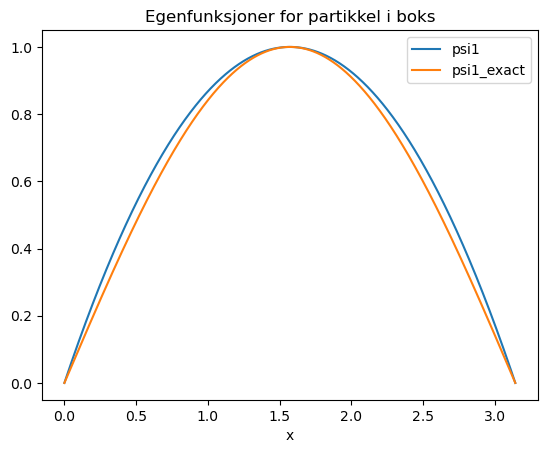

In [98]:

plt.figure()

psi0 = psi(C[:, 0])
psi0 = psi0/psi0[len(x)//2]
psi0_exact = np.sin(np.pi*x/a0)
plt.plot(x, psi0, label='psi1')
plt.plot(x, psi0_exact, label='psi1_exact')
plt.legend()
plt.title('Egenfunksjoner for partikkel i boks')
plt.xlabel('x')
plt.savefig(path + 'variasjon_egenfunksjoner.pdf')
plt.show()